In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import CategoricalNB

# Sample Data Science Process

Reading in data, initial exploration, graphing, and predictions

## Obtaining Data

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Initial Data Exploration

In [4]:
query = df[['total_bill', 'sex']].groupby('sex').agg('count').reset_index().rename({'total_bill': 'count'}, axis=1)
query

,sex,count
0,Male,157
1,Female,87


In [5]:
num_males = query[query['sex'] == 'Male']['count'].values.item()
num_females = query[query['sex'] == 'Female']['count'].values.item()
ratio = num_males / num_females
ratio

1.8045977011494252

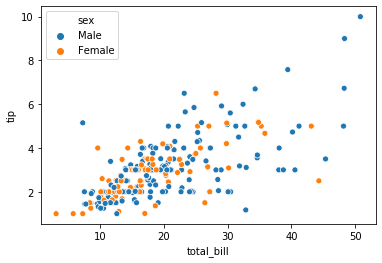

In [6]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex')

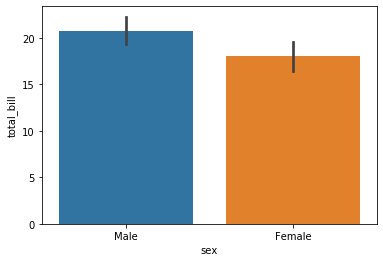

In [7]:
sns.barplot(x='sex', y='total_bill', data=df)

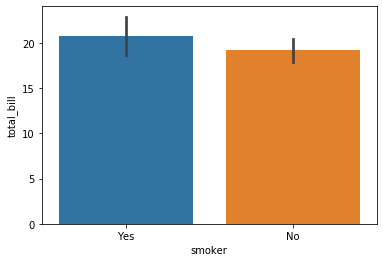

In [8]:
sns.barplot(x='smoker', y='total_bill', data=df)

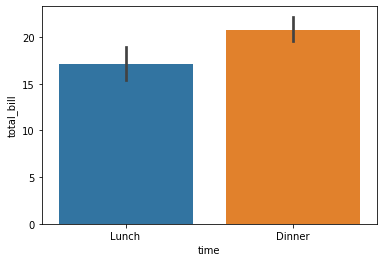

In [9]:
sns.barplot(x='time', y='total_bill', data=df)

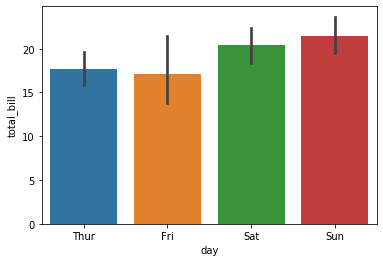

In [10]:
sns.barplot(x='day', y='total_bill', data=df)

Men order almost 2x more than women, men's bills are slightly higher than women.  There is a linear relationship between total bill and tips.  More meals are ordered at dinner and on the weekend

## Cleaning

In [11]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [12]:
dum_df = pd.get_dummies(df, drop_first=True)
dum_df.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


## Prediction

In [13]:
y = dum_df['sex_Female']
columns = list(dum_df.columns)
columns.remove('sex_Female')
x = dum_df[columns]

In [14]:
print(y.head())
x.head()

0    1
1    0
2    0
3    0
4    1
Name: sex_Female, dtype: uint8


,total_bill,tip,size,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,0,0,1,1
1,10.34,1.66,3,1,0,0,1,1
2,21.01,3.50,3,1,0,0,1,1
3,23.68,3.31,2,1,0,0,1,1
4,24.59,3.61,4,1,0,0,1,1


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
x_train.sample(5)

,total_bill,tip,size,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
90,28.97,3.00,2,0,1,0,0,1
59,48.27,6.73,4,1,0,1,0,1
13,18.43,3.00,4,1,0,0,1,1
178,9.60,4.00,2,0,0,0,1,1
20,17.92,4.08,2,1,0,1,0,1


In [17]:
cl = CategoricalNB().fit(x_train, y_train)

In [18]:
predict_index = random.randint(0, x.shape[0])
predict_index

47

In [19]:
print(cl.predict([x.iloc[predict_index]]))
y[predict_index]

[0]


0

In [20]:
print('Accuracy: ' + str(round(cl.score(x_test, y_test) * 100, 2)) + '%')

Accuracy: 63.93%


In [22]:
scores = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    cl = CategoricalNB().fit(x_train, y_train)
    score = cl.score(x_test, y_test)
    scores.append(score)
scores

[0.639344262295082,
 0.6721311475409836,
 0.639344262295082,
 0.6065573770491803,
 0.639344262295082]

Note: sometimes above fails - is this a bug?

In [24]:
ttl = 0
for score in scores:
    ttl += score
avg = ttl / len(scores)
avg

0.639344262295082

In [30]:
print('Accuracy: ' + str(round(avg * 100, 2)) + '%')

Accuracy: 63.93%


Can predict male/female customer with on average 64%